# Одномерная оптимизация (10 баллов)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

В данном домашнем задании рассмотриваются несколько базовых подходов одномерной оптимизации, не использующих знания о градиенте функции. Для его выполнения потребуется следующее определение:

__Определение.__ Одномерная функция $f: [a, b] \to \mathbb{R}$ называется _унимодальной_ на $[a, b]$, если существует $c^{*} \in [a, b]$ такое, что:

1. Для произвольных $x, y \in [a, c^{*}]$, таких что $x < y$, выполнено $f(x) > f(y)$;

2. Для произвольных $x, y \in [c^{*}, b]$, таких что $x < y$, выполнено $f(x) < f(y)$.

Говоря менее формально, мы рассматриваем функции на отрезке, которые строго убывают слева от минимума и строго возрастают справа от него. Из определения незамедлительно следует, что минимум на отрезке $[a, b]$ единственен.

Описание метода __дихотомии__ (бисекции) для поиска минимума унимодальных функций:

1. __Инициализация:__

1.1. Задается унимодальная функция $f(x)$, которая имеет единственный минимум на интервале $[a,b]$.

1.2. Задается начальный интервал $[a,b]$, на котором ищется минимум.

1.3. Задается параметр $\varepsilon$ — точность, с которой нужно найти минимум.

2. __Итеративный шаг метода:__

2.1. Интервал $[a,b]$ делится пополам, и вычисляется середина интервала:

$$c = \frac{a + b}{2}$$

2.2. Выбираются две точки $x_1$ и $x_2$, близкие к середине интервала $c$, но не совпадающие с ней:

$$x_{1} = c - \delta, \quad x_{2} = c + \delta,$$

где $\delta$ небольшое положительное число, обычно $\delta \ll \varepsilon$, поэтому возьмите $\delta = \frac{\varepsilon}{10}$.

2.3. Вычисляются значения функции в точках $x_1$ и $x_2$:

$\bullet$ Если $f(x_{1}) < f(x_{2})$, то минимум находится на отрезке $[a, x_{2}]$, поэтому зона поиска оптимума сужается до $[a, x_2]$.

$\bullet$ Если $f(x_{1}) > f(x_{2})$, то минимум находится на отрезке $[x_{1}, b]$, поэтому зона поиска оптимума сужается до $[x_1, b]$.

$\bullet$ Если $f(x_{1}) = f(x_{2})$, то минимум находится на отрезке $[x_{1}, x_{2}]$, поэтому зона поиска оптимума сужается до $[a, x_{2}]$ или $[x_1, b]$.

3. __Проверка точности:__

$\bullet$ Если длина нового интервала меньше заданной точности $\varepsilon$, то процесс завершается и возвращается значение $c_{\text{out}}$ ($c$ с последней итерации).

$\bullet$ Если длина нового интервала больше заданной точности $\varepsilon$, то повторяется шаг 2 для нового интервала.

__а) (0.5 балла)__ Докажите, что данный алгоритм находит минимум унимодальной функции на отрезке $[a, b]$ с точностью $\varepsilon$ .

Сначала покажем, что алгоритм конечен. Пусть $d_k = b_k - a_k$ . Тогда на каждой итерации длина $d_k \leq \frac{b_{k-1} - a_{k-1}}{2} + 2\delta$ (Уменьшается практически в 2 раза). Следовательно, мы дойдем до критерия останова ($d_k \leq \varepsilon$).

Корректность следует из унимодальности функции $f(x)$ и в силу метода дихотомии.

__б) (0.5 балла)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{\text{out}} - c^*| \leq \varepsilon$)?

Необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

__Замечание__. Величиной $\delta$ надо пренебречь.

__в) (1 балл)__ Придумайте свою унимодальную функцию на отрезке.

1. Покажите, что она является унимодальной на этом отрезке (аналитически).

2. Найдите $c^{*}$ (аналитически).

3. Нарисуйте график функции.

Возьмем функцию $f(x) = x^3 - 3x$ на отрезке $[a,b]$ с $a = 0$ и $b = 3$. Докажем, что она унимодальная на отрезке $[a,b]$.

Посчитаем производную $f(x)$: $f'(x)= 3x^2 - 3$.

Приравняем проивзодную к 0:
$f'(x) = 0 \iff 3x^2 - 3 = 0$.

Корни уравнения получаются $x = -1$ и $x = 1$. На отрезок $[a,b]$ попадает только $x = 1$.

Покажем, что $c^* = 1$. Очевидно, что для произвольных $x, y \in [a, c^{*}]$, таких что $x < y$, выполнено $f(x) > f(y)$ и что для произвольных $x, y \in [c^{*}, b]$, таких что $x < y$, выполнено $f(x) < f(y)$.




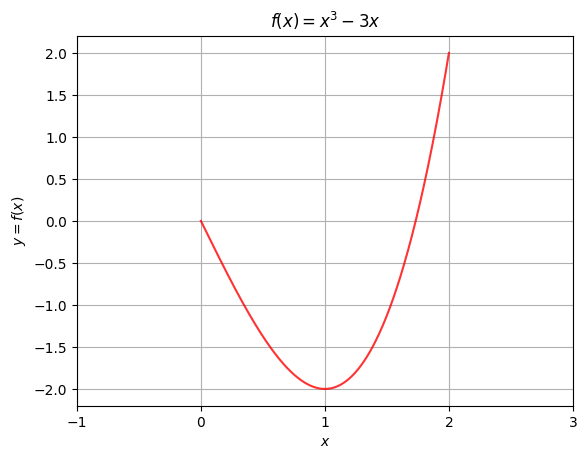

In [12]:
def f(x):
  return x**3 - 3 * x

x = np.linspace(0, 2, 500)

plt.plot(x, f(x), color='red', alpha=0.8)

plt.title(r'$f(x) = x^3 - 3x$')
plt.xticks(np.arange(-1, 4, 1))
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.grid()
plt.show()


__г) (1.5 балла)__ Реализуйте метод дихотомии.

In [13]:
def dichotomy_method(f, a, b, c_star, max_iter=100, epsilon=1e-6, **params):
    """
    Метод дихотомии для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        max_iter (int, optional): Максимальное количество итераций. По умолчанию 100.
        epsilon (float, optional): Точность поиска.
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.
        **params: Именованные гиперпараметры метода.
            params['delta'] - значение гиперпараметра для поиска точек x1 и x2.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """

    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")

    history = []

    c_min = 0
    delta = params.get('delta', epsilon / 10)

    for _ in range(max_iter):
      c_min = (a + b) / 2

      history.append(abs(c_min - c_star))

      x_1 = c_min - delta
      x_2 = c_min + delta

      func_value_x1 = f(x_1)
      func_value_x2 = f(x_2)

      if (func_value_x1 < func_value_x2):
        b = x_2
      else:
        a = x_1

      if (b - a) < epsilon:
        break

    return c_min, history

In [14]:
c_min, history = dichotomy_method(f, a=0, b=3, c_star=1)
print(f"Точка минимума: c_min = {c_min:.6f}, f(c_min) = {f(c_min):.6f}")

Точка минимума: c_min = 1.000000, f(c_min) = -2.000000


Постройте сравнительный график зависимости точности метода $|c_{\text{out}} - c^*|$ и теоретической оценки от числа итераций. Значение $\delta$ выберите равным $10^{-8} \cdot (b - a)$. График должен соответствовать следующим критериям:

1. Размер должен быть удобен для чтения
2. Масштаб осей (обычный или логарифмический)
3. Подписи осей
4. Легенда (так как на графике несколько линий)
5. Толщина/цвет/сетка (на ваше усмотрение, но должно быть читаемо)

In [42]:
a, b, c_star = 0, 3, 1
delta = 1e-8 * (b - a)
epsilon = 1e-7

c_out, history = dichotomy_method(f, a, b, c_star, delta=delta)


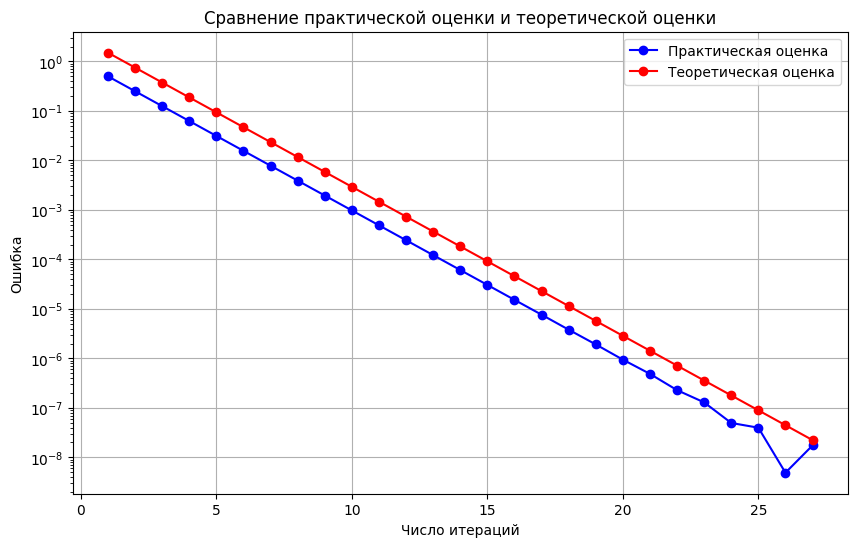

In [41]:

theoretical_failure = [(b - a) / (2**(i+1)) for i in range(len(history))]
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(history) + 1), history, 'bo-',label='Практическая оценка')
plt.plot(range(1, len(theoretical_failure) + 1), theoretical_failure, 'ro-', label='Теоретическая оценка')

plt.yscale("log")
plt.xlabel('Число итераций')
plt.ylabel('Ошибка')
plt.title('Сравнение практической оценки и теоретической оценки')
plt.legend()
plt.grid()
plt.show()



__д) (1 балл)__ Теперь сравним работу метода при разных значениях гиперпараметра $\delta$. Предлагается рассмотреть следующие значения:
1. $\delta = 10^{-12} \cdot (b - a)$;
2. $\delta = 10^{-9} \cdot (b - a)$;
3. $\delta = 10^{-6} \cdot (b - a)$;
4. $\delta = 10^{-3} \cdot (b - a)$;
5. $\delta = 10^{-1} \cdot (b - a)$.

Постройте сравнительный график зависимости критерия от номера итерации.

In [ ]:
# Ваше решение (Code)

Что можно сказать о зависимости сходимости от значения параметра $\delta$? Объясните, почему для малых значений наблюдается плохая сходимость. Для какого значения наблюдается наилучшая сходимость?

In [ ]:
# Ваше решение (Markdown)

__e) (2 балла)__ До этого использовался подход с использованием постоянной величины $\delta$. Рассмотрим адаптивный подход, а именно - на каждой итерации значения $\delta$ будет определяться через длину интервала $l_k$, полученную на $k$-ой итерации. Предлагается рассмотреть следующие значения:

1. $\delta = 10^{-6} \cdot l_k$;
2. $\delta = 10^{-3} \cdot l_k$;
3. $\delta = 10^{-1} \cdot l_k$;
4. $\delta = 6^{-1} \cdot l_k$.

Последняя модификация также называется __тернарным__ поиском, при которой отрезок делится на 3 части на каждой итерации.

Постройте сравнительный график сходимости значения критерия от различных значений $\delta$. Также добавьте на график сходимость с наилучшим постоянным значением $\delta$, полученном в предыдущем пункте.

In [ ]:
def dichotomy_adaptive(f, a, b, c_star, max_iter=100, epsilon=1e-6, **params):
    """
    Метод дихотомии для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        max_iter (int, optional): Максимальное количество итераций. По умолчанию 100.
        epsilon (float, optional): Точность поиска.
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.
        **params: Именованные гиперпараметры метода.
            params['delta'](a, b) - функция, возвращающая значение интервала на k-ой итерации.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """

    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")

    history = []

    # YOUR CODE HERE
    ...

    return ...

In [ ]:
# Ваше решение (Code)

Помогает ли использование адаптивного подхода в достижении лучшей сходимости?

In [ ]:
# Ваше решение (Markdown)

__ё) (2 балла)__ Реализуйте метод __золотого сечения__. Для этого на каждой итерации подсчитываются точки $x_{1}, x_{2}$, симметричные относительно середины интервала и делящие исходный интервал в пропорции золотого сечения, то есть 1 к $\frac{1 + \sqrt{5}}{2}$. Обновления краевого значения происходит по аналогичной процедуре.

In [ ]:
def golden_ration_method(f, a, b, c_star, epsilon=1e-6):
    """
    Метод золотого сечения для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        epsilon (float, optional): Точность поиска.
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """

    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")

    history = []

    # YOUR CODE HERE
    ...

    return ...

Постройте график сходимости.

In [ ]:
# Ваше решение (Code)

__ж) (1.5 балла)__ Постройте сравнительные графики для методов ```dichotomy_method```, ```dichotomy_adaptive``` и ```golden_ratio_method``` для оптимальных значений параметра $\delta$. Первый график должен быть значением критерия от числа итераций.

In [ ]:
# Ваше решение (Code)

Второй - критерий от количества вызовов функции $f$.

In [ ]:
# Ваше решение (Code)

Что можно сказать о применимости метода золотого сечения? В чем он лучше по сравнению с методом дихотомии?

In [ ]:
# Ваше решение (Markdown)